# Data mining



In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib as pl
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data


In [ ]:
# Load the dataset
df = pd.read_csv('Melbourne_housing_FULL.csv')
print(df.columns)
print(df.shape)
print('Postcodes: ', df['Postcode'].nunique())
df = df[['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'Date', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Regionname', 'Postcode']]

df = df.dropna() # we carelessly remove all rows that contain any NaN or None values (see datawrangling why this may be dangerous.)
df['Date']= pd.to_datetime(df['Date'], format='mixed')  
#df.describe()
df.head()

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
(34857, 21)
Postcodes:  211


,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Postcode
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,2016-04-02,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,3067.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,2017-04-03,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,3067.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,2016-04-06,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,3067.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,2016-07-05,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,Northern Metropolitan,3067.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,2016-08-10,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,Northern Metropolitan,3067.0


## Exploratory data analysis

Seaborn is a library for statistical data visualization. We will us it to explore the Melbourne dataset. Its function pairplot can be used to visualize a grid of scatterplots between numerical variables of the dataset and histograms in the diagonal of the grid. It may take a few minutes to finish the plot. It gives additional possibility to display more than two variables through coloring: 'hue = Type'. 

Type is u for unit respective appartement, h for house typically freestanding independent and t for townhouse typically part of a multi-unit complex, sharing one or more walls with adjacent units. 

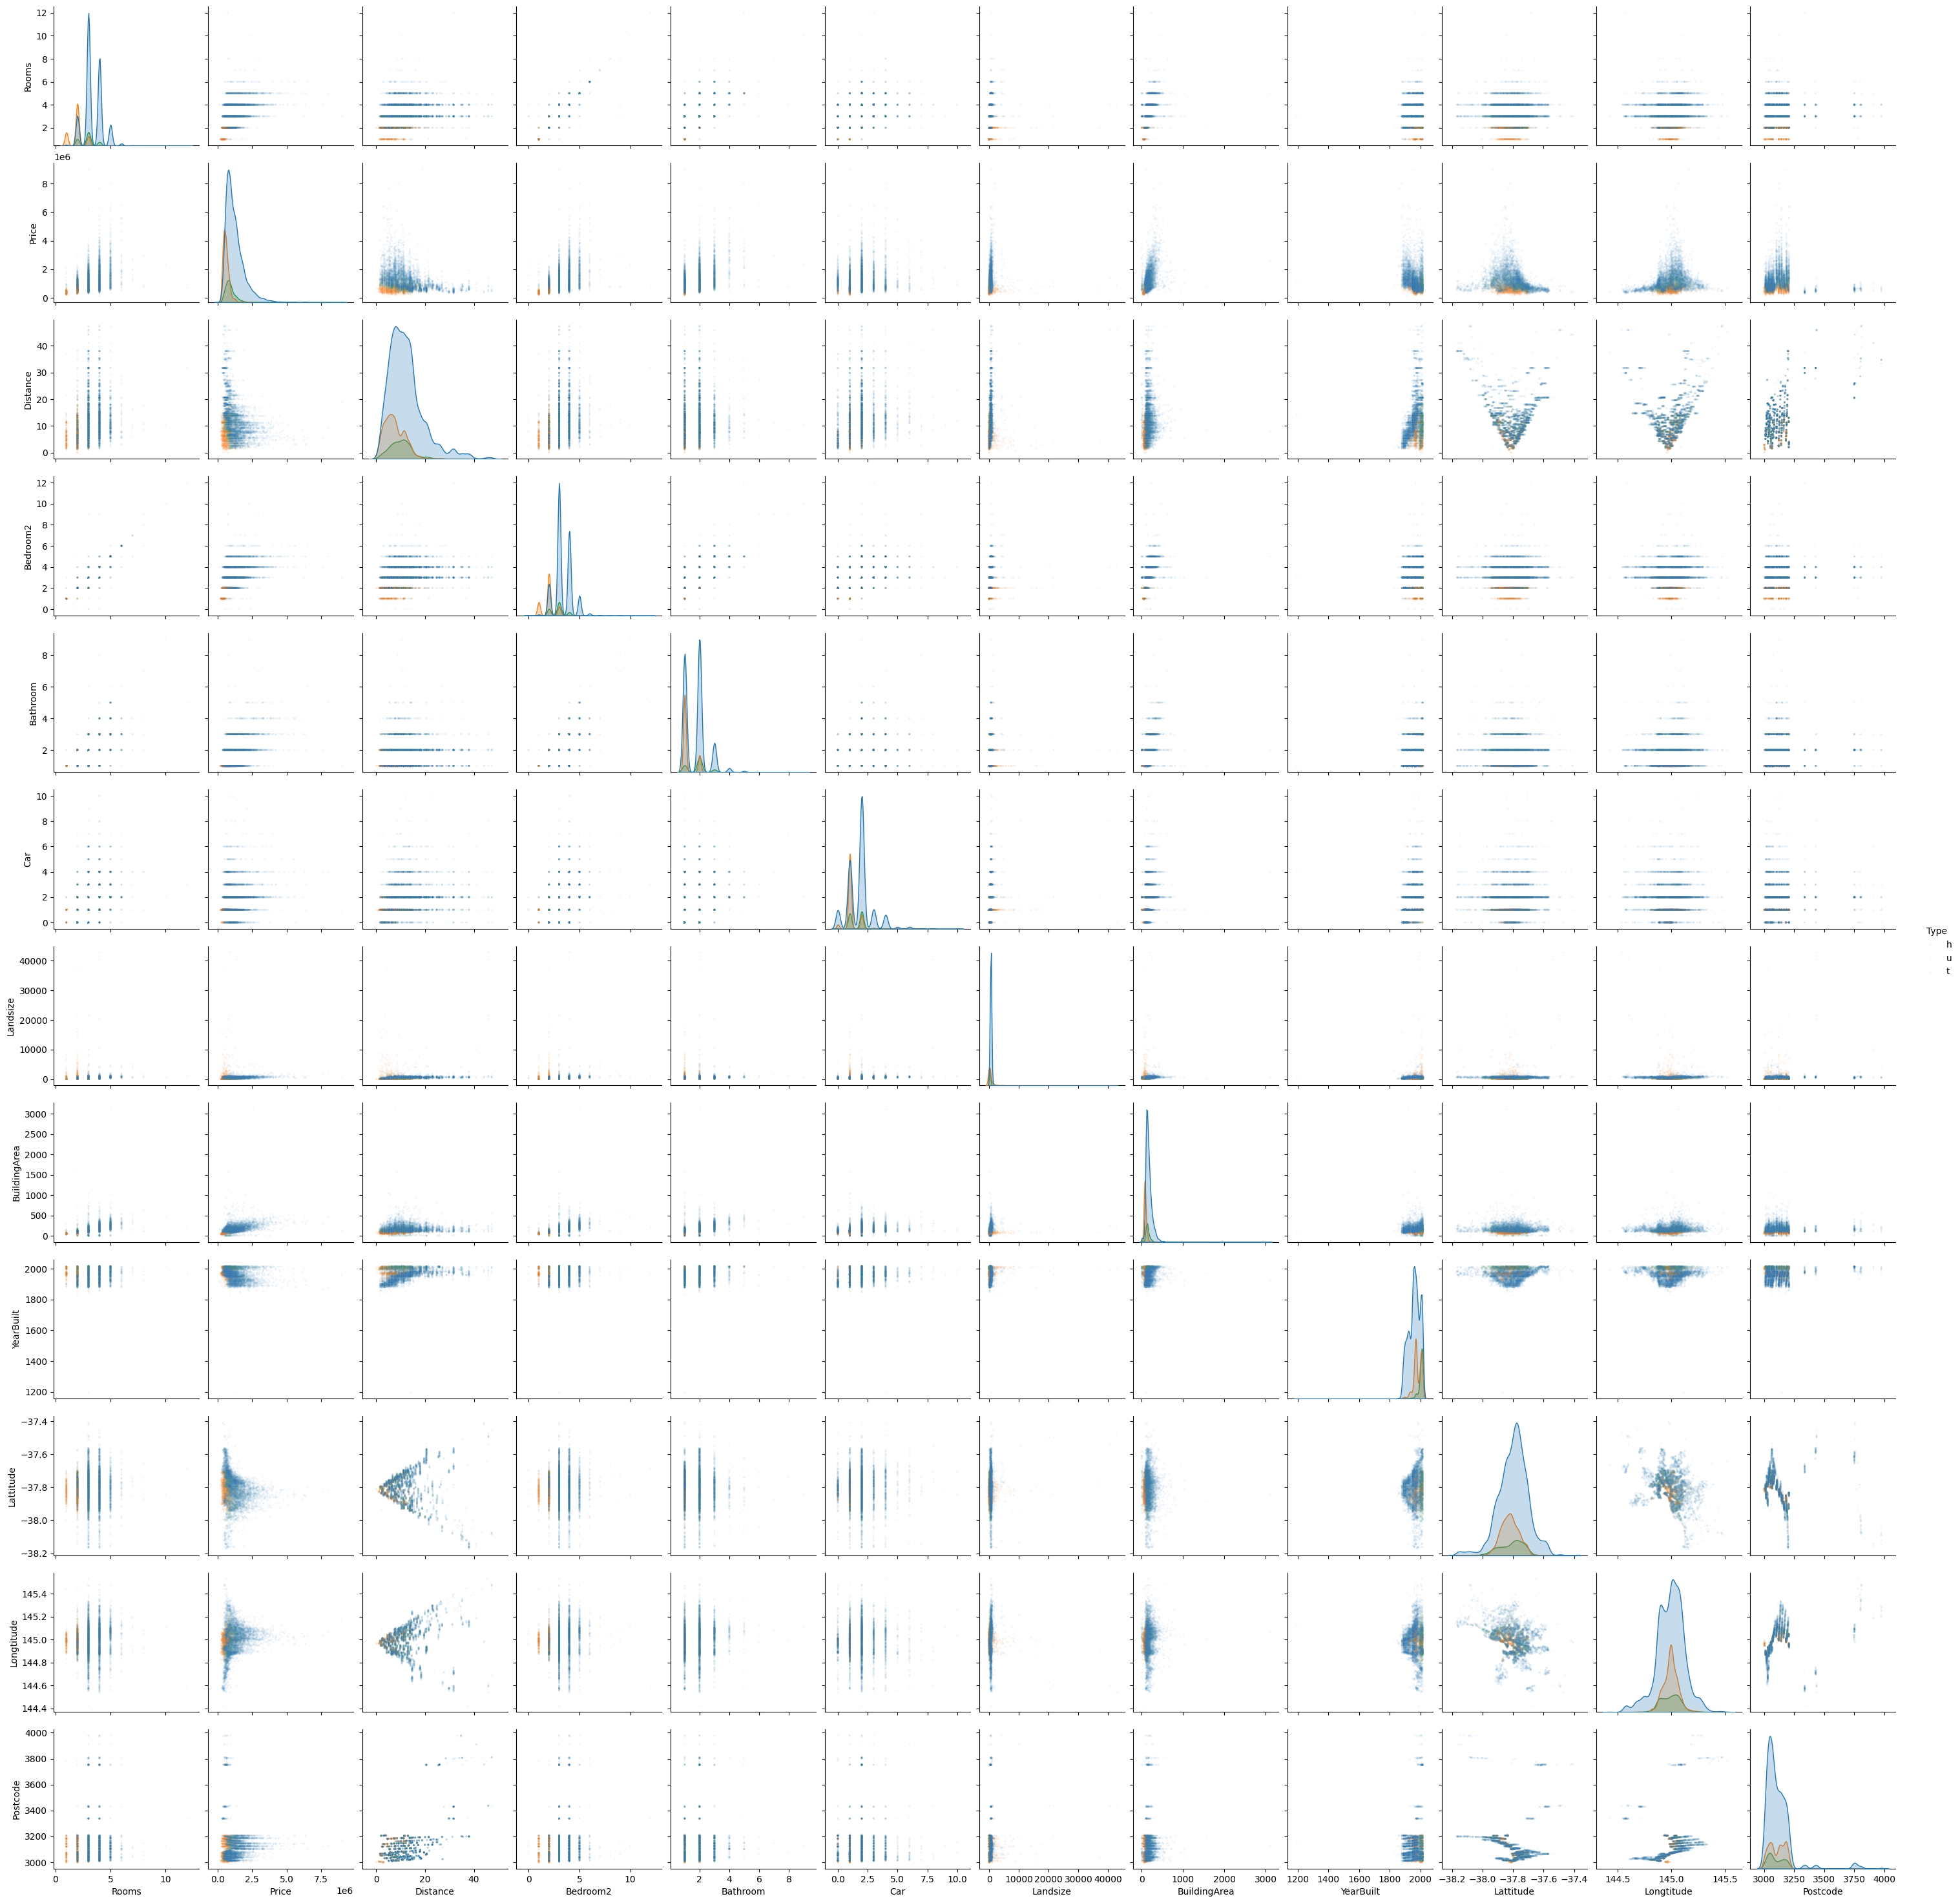

In [ ]:
sns.pairplot(df, kind='scatter', hue ="Type", plot_kws={'alpha':0.05, "s": 5}) 


Exercise 1: Play with the alpha value between 1 and 0.02. Also change the size parameter s. Get a feeling for the differences this makes. Which settings give you an informative view? Keep the plots open for easy comparisons.

Exercise 2: Imagine that you want to build a system that can help investors to evaluate new objects on the market. This system which you want to develop should give a rating if an object is low priced or expensive based on the historical available data. Inspect the the plots carefully. Make an assumption about the correlation between the  variable at hand and the price (our target variable ) based on the description of the variables. If you do not know what a variable name stands for research it here: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market. For example when looking at scatter plot of Price as a function of Rooms a reasonable assumption could be: "The more rooms a property the higher the price." Make lists of the insights: What fits your apriori assumption and what surprised you. Also look at the type.

Solution: Surprises: The price does simply imcrease with the number of bathrooms. Very many bathrooms seem to be negative for the price. Why?

### Plotting relationships of 3 dimensions as heat maps

Sometimes plotting data in a diffrent way can be eye-opening. Here for example we plot a heatmap, where the color represents the price of the objects at the lat. and long. of the location

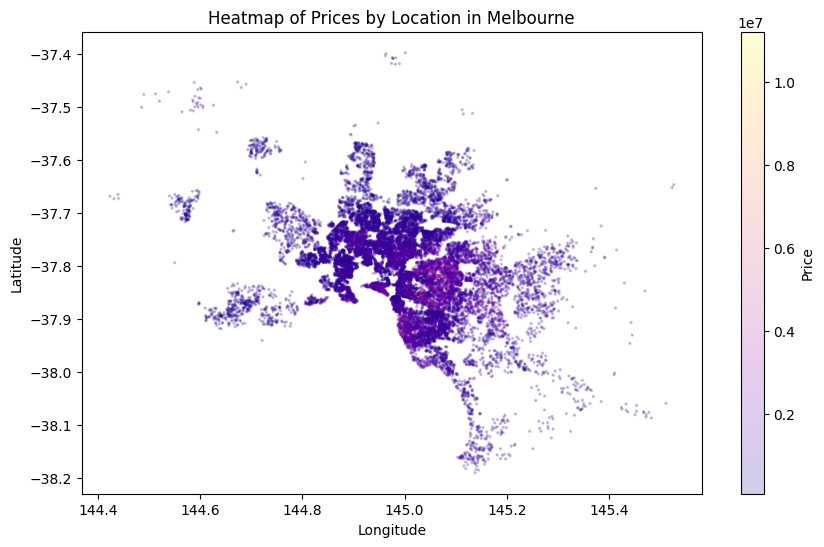

In [ ]:

# Load the dataset
df = pd.read_csv('Melbourne_housing_FULL.csv')

# Check for and drop rows with missing values in the relevant columns
df = df.dropna(subset=['Lattitude', 'Longtitude', 'Price'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a scatter plot where color indicates price
# Adjust the `s` parameter to change the size of the points if necessary
# and `cmap` to change color map as desired
scatter = plt.scatter(df['Longtitude'], df['Lattitude'], c=df['Price'], cmap='plasma', alpha=0.2, s = 2)

# Add a color bar for reference
plt.colorbar(scatter, label='Price')

# Set titles and labels
plt.title('Heatmap of Prices by Location in Melbourne')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

Exercise 3: Try out different colormaps from the selection https://matplotlib.org/stable/users/explain/colors/colormaps.html . Which colormap visualizes the spatial price distribution best for you?

Solution: gist_ncar and similar show the differences quite well.

## Similarity Analysis

Similarity between datapoints can e calculated based on cosine similarity. It allows us to calculate a similarity score between a pair of numerical datapoints. 

The following code block calculates the cosine similarity score between a subset of the data (n=500).

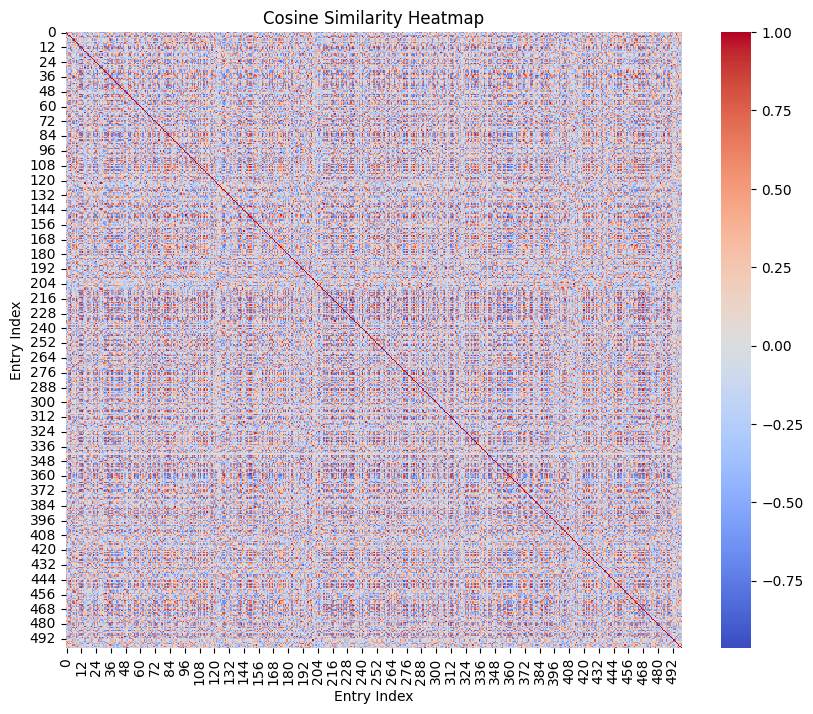

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Melbourne_housing_FULL.csv')

# Drop rows with missing values in the numerical columns
df.dropna(subset=['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude'], inplace=True)

# Select only the numerical columns
numerical_data = df[['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']]

# Reduce the number of datapoints
numerical_data = numerical_data.sample(n=500)
# Normalize the data
scaler = StandardScaler()
numerical_data_normalized = scaler.fit_transform(numerical_data)

# Calculate cosine similarity
cosine_sim = cosine_similarity(numerical_data_normalized)

# Create a heatmap of the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, annot=False, cmap='coolwarm', square=True)
plt.title('Cosine Similarity Heatmap')
plt.xlabel('Entry Index')
plt.ylabel('Entry Index')
plt.show()

Exercise 4: What does this heatmap represent? Why is the diagonal a red line? What does a greyish line represent? 

Solution: Each line represents one datapoint and the colors show the cosine-similarity to all other objects. The diagonal is 1 as each vector has a similarity of 1 with itself.  

Exercise 5: Modify the code above and remove Distance, Latittude and Longtitude. What could you use it for if you were a website like Immoscout24?

Solution: This could be used to recommend similar objects that can be located anywhere to customers that look for certain characteristics without preference for location.

Now we want to use the similarity score to find similar objects to a given item.

In [ ]:
index_of_object = 0
numerical_data.iloc[index_of_object]

Rooms                3.0000
Price           840000.0000
Distance            11.2000
Bedroom2             3.0000
Bathroom             2.0000
Car                  2.0000
Landsize           374.0000
BuildingArea       180.0000
YearBuilt         1990.0000
Lattitude          -37.7445
Longtitude         144.8834
Name: 7171, dtype: float64

In [ ]:
# Find the index of the most similar entries to the first entry
similarity_scores = cosine_sim[index_of_object]  # cosine similarities with the given entry
most_similar_index = similarity_scores.argsort()[-3:]  # indices of the most similar 3 entries (excluding itself)

# Display the most similar entries
most_similar_entries = numerical_data.iloc[most_similar_index]
print(most_similar_entries)

       Rooms     Price  Distance  Bedroom2  Bathroom  Car  Landsize  \
19193      3  520000.0      18.0       3.0       2.0  2.0     389.0   
32954      3  781000.0      10.5       3.0       2.0  2.0     292.0   
7171       3  840000.0      11.2       3.0       2.0  2.0     374.0   

       BuildingArea  YearBuilt  Lattitude  Longtitude  
19193         161.0     2005.0  -37.71364   144.76031  
32954         164.0     2015.0  -37.77792   144.81678  
7171          180.0     1990.0  -37.74450   144.88340  


Exercise 6: Change the index_of_object and look at the resulting entries. Are the proposed objects really similar? 

Exercise 7: If one vector is a multiple of another vector and the cosine similarity is calculated between. For example 1 room, 1 car, 100k price comparred to 2 room, 2 car, 200k price. What is the result?

Solution: Because they point in the same direction the angle between them is 0. Therefore the cosine similarity score is 1!

Exercise 8: Can you calculate a similarity matrix of a dataset of n = 10k, 100k, 1000k? Calculate the required memory if each similarity score is stored as 2 bytes.

Solution: The number of calculations scales with the square of n. So it requires long time to perform the calculation and also requires a lot of memory. It does not scale 

## Clustering 

Different algorithms a common for clustering, each with its advantages and drawbacks. See https://scikit-learn.org/stable/modules/clustering.html for an overview. We explore two common methods.

### K-means

https://scikit-learn.org/stable/modules/clustering.html#k-means 

First we experiment with K-means from the machine learning librabry Scikit_learn. 

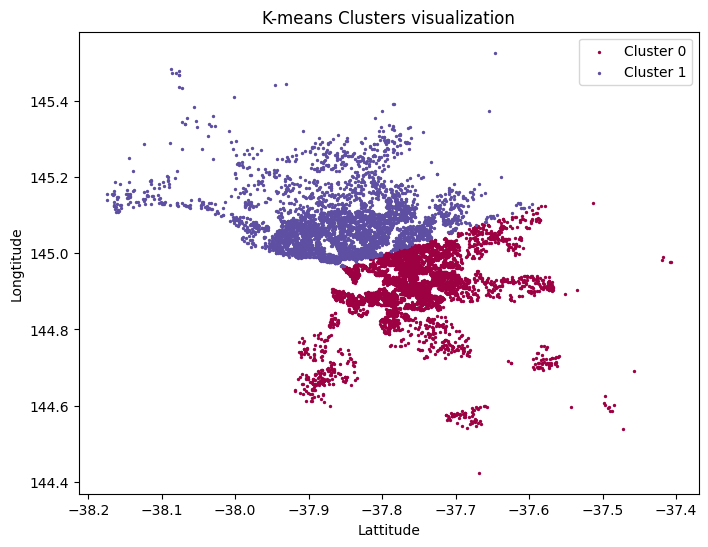

In [ ]:
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('Melbourne_housing_FULL.csv')

df = df.dropna() # we carelessly remove all rows that contain any NaN or None values (see datawrangling why this may be dangerous.)

X = df[['Lattitude', 'Longtitude']]


K = 2
kmeans = KMeans(n_clusters=K, random_state=0, n_init=20).fit(X)

df['cluster'] = kmeans.predict(X)

# Plotting
plt.figure(figsize=(8, 6))
#colors = ['red', 'blue', 'green', 'yellow', 'purple']  # Adjust based on your n_clusters
colors = plt.cm.Spectral(np.linspace(0, 1, kmeans.n_clusters))
for i, color in zip(range(kmeans.n_clusters), colors):
    plt.scatter(df[df['cluster'] == i]['Lattitude'], df[df['cluster'] == i]['Longtitude'], label=f'Cluster {i}', s = 2, color=color)
plt.title('K-means Clusters visualization')
plt.xlabel('Lattitude')
plt.ylabel('Longtitude')
plt.legend()
plt.show()



Exercise 9: Play with the parameter K. What choice gives you a the feeling that the clusters that you perceive are clustered well? What happens when you choose the parameter very high (>100)?

Solution: Around 10 seems to be a good to capture the visible neighborhoods well. Very high K divide even groups that seem to belong together. 

Exercise 10: What do the cluster boundaries look like? What do you notice? Can you explain why they look like this?

Solution: The decision boundaries are straight lines between each two clusters, because the equal distance between two centroids is a straight line.

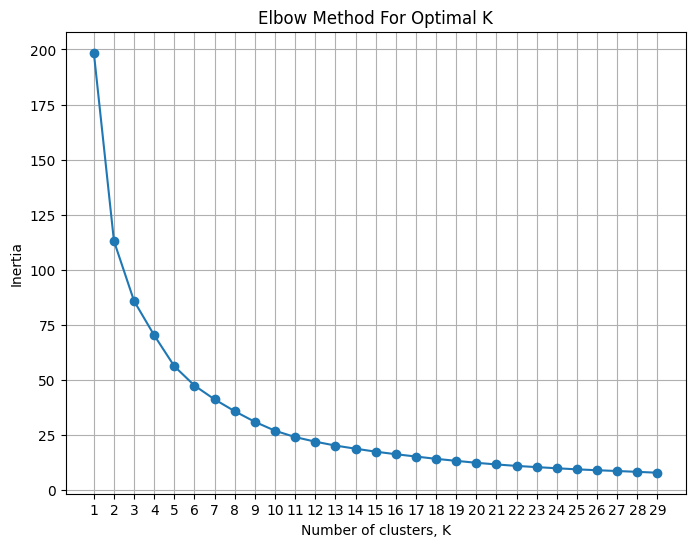

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('Melbourne_housing_FULL.csv')

# we carelessly remove all rows that contain any NaN or None values (see datawrangling why this may be dangerous.)
df = df.dropna() 

# Selecting the features
X = df[['Lattitude', 'Longtitude']]

# Calculate inertia for a range of k values
inertias = []
k_range = range(1, 30)  # Adjust the upper limit if needed
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=20)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters, K')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


Exercise 11: Can you explain why the Inertia ( = Sum of squared distances of the points to the nearest centroid) decreases with higher K? 

Solution: The number of centroids increases which makes the average distances smaller. 

Exercise 12: Which K would you choose?

Solution: Often choosing K is difficult and remains ambiguous. A choice between 5 and 11 seems reasonable.

### DBSCAN

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

DBSCAN (Density-Based Spatial Clustering of Applications with Noise). Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density. 

In [ ]:
# The following function is used to generate good colormaps. 
def rand_cmap(nlabels, type='bright', first_color_black=True, last_color_black=False, verbose=False):
    """
    Creates a random colormap to be used together with matplotlib. Useful for segmentation tasks
    :param nlabels: Number of labels (size of colormap)
    :param type: 'bright' for strong colors, 'soft' for pastel colors
    :param first_color_black: Option to use first color as black, True or False
    :param last_color_black: Option to use last color as black, True or False
    :param verbose: Prints the number of labels and shows the colormap. True or False
    :return: colormap for matplotlib
    """
    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np


    if type not in ('bright', 'soft'):
        print ('Please choose "bright" or "soft" for type')
        return

    if verbose:
        print('Number of labels: ' + str(nlabels))

    # Generate color map for bright colors, based on hsv
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in range(nlabels)]

        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]

        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Generate soft pastel colors, by limiting the RGB spectrum
    if type == 'soft':
        low = 0.6
        high = 0.95
        randRGBcolors = [(np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high)) for i in range(nlabels)]

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))

        bounds = np.linspace(0, nlabels, nlabels + 1)
        norm = colors.BoundaryNorm(bounds, nlabels)

        cb = colorbar.ColorbarBase(ax, cmap=random_colormap, norm=norm, spacing='proportional', ticks=None,
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')

    return random_colormap

Number of labels: 300


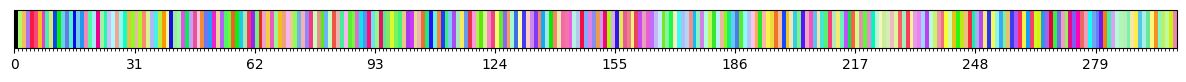

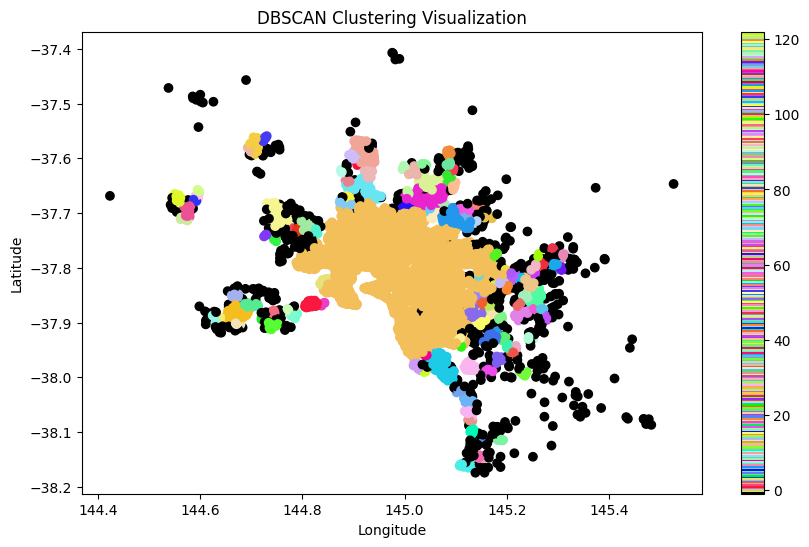

Cluster
 0      6880
-1       547
 23       87
 20       84
 6        81
        ... 
 71        4
 120       4
 88        3
 99        3
 104       3
Name: count, Length: 124, dtype: int64


In [ ]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Load the dataset
df = pd.read_csv('Melbourne_housing_FULL.csv')

# Drop rows with missing values in the numerical columns
df.dropna(subset=['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude'], inplace=True)

# Select only the numerical columns
numerical_data = df[['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']]

# Setup DBSCAN
epsilon = 0.0001  # For reference: 0.01 is roughly equivalent with 1 km
min_samples = 4
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='haversine')

# Fit DBSCAN
# Convert latitude and longitude from degrees to radians for use in Haversine formula
coords = numerical_data[['Lattitude', 'Longtitude']].apply(np.radians)
labels = dbscan.fit_predict(coords)

# Attach labels back to the original dataframe
df['Cluster'] = labels

# Plotting results
new_cmap = rand_cmap(300, type='bright', first_color_black=True, last_color_black=False, verbose=True)
col = (np.random.random(), np.random.random(), np.random.random())
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Longtitude'], df['Lattitude'], c=df['Cluster'], cmap=new_cmap, label=df['Cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering Visualization')
plt.colorbar(scatter)
plt.show()

# Display some of the cluster data
print(df['Cluster'].value_counts())

Exercise 13: Play with the epsilon parameter. What are the results? Can you find parameters to get clusters that correspond to the main city area plus a few clusters for villages?

Solution: Small epsilons mostly cluster the city center together as only the density there is high enough. The rest is put into the noise cluster. epsilon = 0.0005 and minPts = 12 or 0.0003 and minPts 22

Exercise 14: What does the -1 (plotted in black) represent? What do you notice about the cluster boundaries? Why do they look as the do?

Solution: The black -1 cluster represents the noise cluster. The boundaries follow zig-zag lines depending on the local densities. 

## Classification

### KNN-Classifier

Here we train the KNN Classifier. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Our motivation is that we will receive a newer dataset that we want to integrate into our exisiting dataset. Unfortunately the Variable 'Type' is missing in the new dataset. We want to train this classifier to classify the new dataset to fill in the type information.

Class counts:
 Type
h    6625
u    1540
t     722
Name: count, dtype: int64
Class proportions:
 Type
h    0.745471
u    0.173287
t    0.081242
Name: proportion, dtype: float64


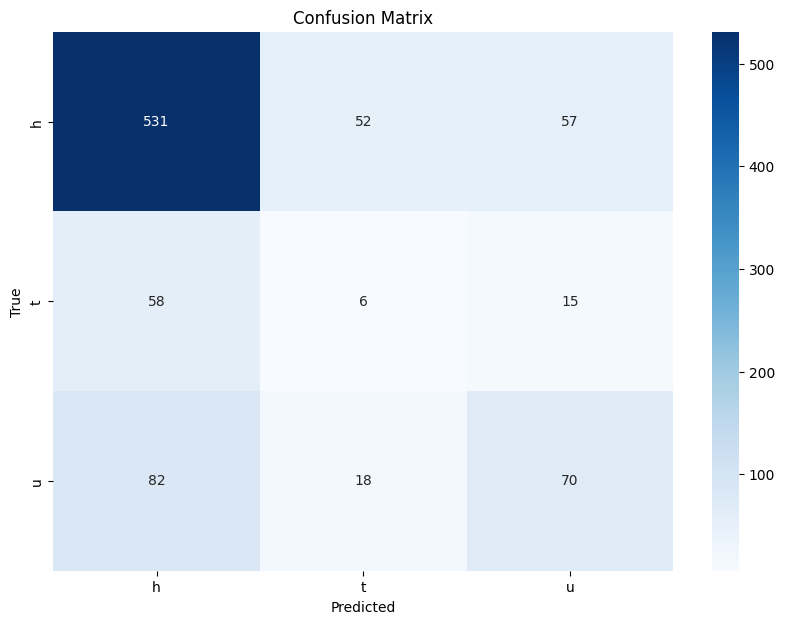

Accuracy: 0.6827896512935883
F1 Score: 0.6758628979089796


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Load the dataset
df = pd.read_csv('Melbourne_housing_FULL.csv')

# Handle missing values
df.dropna(subset=['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude'], inplace=True)

# Count the occurrences of each class in the 'Type' column
class_counts = df['Type'].value_counts()
print("Class counts:\n", class_counts)

# Normalize the class counts to see the proportion of each class
class_proportions = df['Type'].value_counts(normalize=True)
print("Class proportions:\n", class_proportions)

# Encoding categorical variables
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

# Assuming all other categorical columns should be encoded
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Select features and target
X = df.drop('Type', axis=1)  # features
y = df['Type']               # target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the K-nearest neighbors classifier
K = 1
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate F1 score
# For multiclass classification, you might need to specify the averaging method
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' takes into account label imbalance
print(f'F1 Score: {f1}')

Exercise 15: Vary the parameter K to optimize the F1 score. Also inspect the confusion matrix. Can you explain what the confusion matrix shows? 

Solution: K = 2 seems to give the best F1 Score. The confusion matrix shows how the classifier performs on each class. They may be differently easy to classify. 

Exercise 16: Why should you not optimize for the accuracy score?

Solution: This dataset is unbalanced meaning that not all classes contain the same number of datapoints (75% to 17% to 8%). Most objects are type h (for houses). If a naive classifier classifies everything as 'h' it has an accuracy of 75% which seems good but is terrible in reality! The F1 Score is not forgiving in such situations but harder to interpret.

## Regression analysis

We can calculate how what kind of influence each of the variables has on a target variable. Here we are interested in the price of the objects.

https://www.statsmodels.org/stable/#citation

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('Melbourne_housing_FULL.csv')

# Select only numerical columns, including 'Price'
numerical = df.select_dtypes(include=[float, int])

# Drop rows with missing values in any of the numerical columns
numerical = numerical.dropna()

# Separate the predictors and the response variable
X = numerical.drop('Price', axis=1)  # all numerical columns except 'Price'
y = numerical['Price']

# Add a constant to the predictors, important for regression analysis
X = sm.add_constant(X)

# Create the regression model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     1089.
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:36:04   Log-Likelihood:            -1.2793e+05
No. Observations:                8887   AIC:                         2.559e+05
Df Residuals:                    8874   BIC:                         2.560e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.213e+08   6.02e+06    -20.148

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c15d75fc-6be7-4648-b2d0-38ac286e545e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>